In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("instagram_reach.csv")
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [3]:
df.tail()

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222
99,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3 hours,109


In [4]:
df.shape

(100, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [6]:
df['Time since posted'] = df['Time since posted'].str[:2].astype('int64')
df.rename(columns = {'Time since posted':'Time since posted(hours)'}, inplace = True)

In [7]:
df.head()

,USERNAME,Caption,Followers,Hashtags,Time since posted(hours),Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [8]:
df1 = df.copy() 
df1 = df1[['Followers','Time since posted(hours)','Likes']]

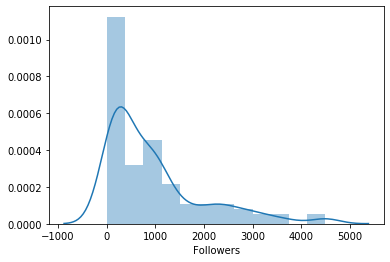

In [9]:
# Checking distribution of column Followers
sns.distplot(df1['Followers'])
plt.show()

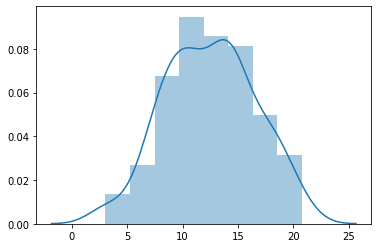

In [10]:
from scipy import stats

# Applying box_cox transformation
followers_boxcox = stats.boxcox(df1['Followers'])[0]

# Checking distribution after transformation
sns.distplot(followers_boxcox)
plt.show()

In [11]:
# Applying box_cox transformation and saving in the column
df1['Followers'] = stats.boxcox(df1['Followers'])[0]

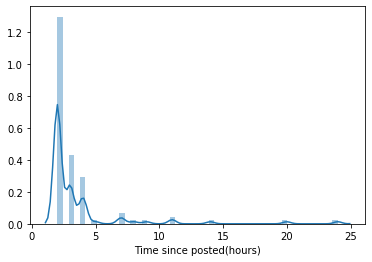

In [12]:
# Checking distribution of the column
sns.distplot(df1['Time since posted(hours)'])
plt.show()

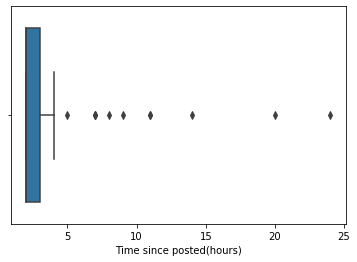

In [13]:
# Boxplot to check outliers
sns.boxplot(df1['Time since posted(hours)'])
plt.show()

In [14]:
# Seclection data with 'Time since posted(hours)' value less than or equal to 20
df1 = df1[df1['Time since posted(hours)'] < 20]

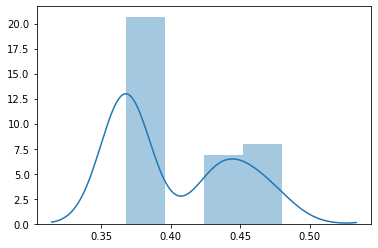

In [15]:
# Applying box_cox transformation
time_boxcox = stats.boxcox(df1['Time since posted(hours)'])[0]

# Checking distribution after transformation
sns.distplot(time_boxcox)
plt.show()

In [16]:
# Applying box_cox transformation and saving in the column
df1['Time since posted(hours)'] = stats.boxcox(df1['Time since posted(hours)'])[0]

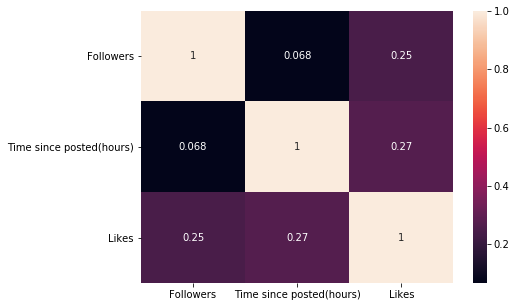

In [17]:
#correlation plot
plt.figure(figsize=(7,5))
correlation_matrix = df1.corr()
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [18]:
# Seperating independent and dependant variable
X = df1[['Followers','Time since posted(hours)']]
y = df1['Likes']

In [19]:
from sklearn import preprocessing 

# Standarizing the independent variable
scaler = preprocessing.RobustScaler() 
X_standard = scaler.fit_transform(X) 
X_standard = pd.DataFrame(X_standard, columns =X.columns)

In [20]:
# Five point summary
X_standard.describe().T

,count,mean,std,min,25%,50%,75%,max
Followers,98.0,-0.017689,0.772813,-1.82149,-0.523268,-1.717376e-16,0.476732,1.609808
Time since posted(hours),98.0,0.523378,0.642983,0.00000,0.000000,0.000000e+00,1.000000,1.727417


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [22]:
# Importing LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Creating object and fitting the model
lin_reg = LinearRegression()
model = lin_reg.fit(X_train,y_train)

In [23]:
# Predicting for test dataset
y_pred = model.predict(X_test)

In [24]:
# Model Evaluation 

# Importing metrics from sklearn 
from sklearn.metrics import mean_squared_error, mean_absolute_error

# To find Mean Squared Error(mse)
mse = ((mean_squared_error(y_test, y_pred)))
print("MSE:",round(mse,2))

# To find Mean Absolute Error(mse)
mae = (mean_absolute_error(y_test, y_pred))
print("MAE:",round(mse,2))

# To find Root Mean Squared Error(rmse)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("RMSE:",round(rmse,2))

MSE: 425.4
MAE: 425.4
RMSE: 20.63
